In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-dataset/data.yaml
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5400.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5274.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5822.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5749.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5470.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5596.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5687.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5295.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5763.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5793.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5561.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5659.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5528.jpg
/kaggle/input/chest-xray-dataset/val/pneumonia/pneumonia-5451.jpg
/kaggle/input/chest-xray-dataset/

In [32]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

In [33]:
dir = "/kaggle/input/chest-xray-dataset"
os.listdir(dir)


['data.yaml', 'val', 'test', 'train']

In [34]:
train_dir=os.path.join(dir,'train')
test_dir=os.path.join(dir,'test')
valdir=os.path.join(dir,'val')

In [35]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    valdir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 20450 files belonging to 3 classes.
Found 2534 files belonging to 3 classes.
Found 2569 files belonging to 3 classes.


In [36]:
class_names=train_ds.class_names
print(class_names)

['normal', 'pneumonia', 'tuberculosis']


In [37]:
len(train_ds)

640

In [38]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [39]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping


AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
vgg_base.trainable = False 

model = models.Sequential([
    data_augmentation,
    vgg_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop],
    class_weight=class_weights 
)

model.evaluate(test_ds)


Epoch 1/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 132s 201ms/step - accuracy: 0.6248 - loss: 3.1696 - val_accuracy: 0.7202 - val_loss: 0.5688
Epoch 2/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 128s 199ms/step - accuracy: 0.7153 - loss: 0.5183 - val_accuracy: 0.7340 - val_loss: 0.4739
Epoch 3/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.7229 - loss: 0.5101 - val_accuracy: 0.7494 - val_loss: 0.4703
Epoch 4/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.7142 - loss: 0.5047 - val_accuracy: 0.7545 - val_loss: 0.4477
Epoch 5/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.7220 - loss: 0.5060 - val_accuracy: 0.7249 - val_loss: 0.4954
Epoch 6/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 127s 199ms/step - accuracy: 0.7248 - loss: 0.4981 - val_accuracy: 0.7518 - val_loss: 0.4549
Epoch 7/30
640/640 ━━━━━━━━━━━━━━━━━━━━ 128s 200ms/step - accuracy: 0.7346 - loss: 0.4971 - val_accuracy: 0.7455 - val_loss: 0.4771
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 195ms/step - accuracy: 0.7505 - loss: 0.4435


[0.44592782855033875, 0.7629427909851074]

In [40]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 168ms/step - accuracy: 0.7505 - loss: 0.4370

✅ Test Accuracy: 0.7629
✅ Test Loss: 0.4459


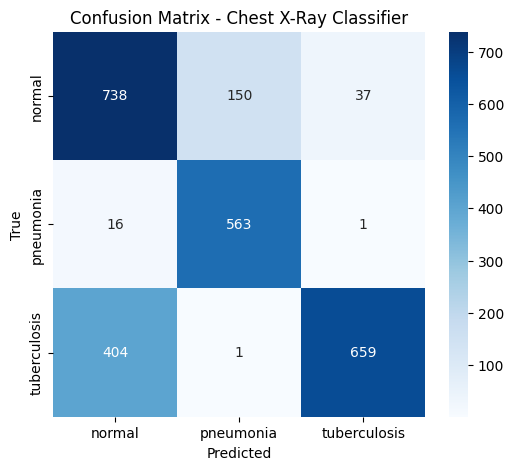


Classification Report:

              precision    recall  f1-score   support

      normal       0.64      0.80      0.71       925
   pneumonia       0.79      0.97      0.87       580
tuberculosis       0.95      0.62      0.75      1064

    accuracy                           0.76      2569
   macro avg       0.79      0.80      0.78      2569
weighted avg       0.80      0.76      0.76      2569



In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images,verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Chest X-Ray Classifier")
plt.show()
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))